In [144]:
import pandas as pd 
import numpy as np
import math
import IPython
import IPython.display
import matplotlib.pyplot as plt
# from kneed import KneeLocator
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import seaborn as sns
import json
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.max_columns', None)

In [145]:
with open('../data/block_stats_2022-03-17.json','r') as f:
    data = json.loads(f.read())
df = pd.json_normalize(data,  max_level=1)

In [146]:
print(df.shape)

df.head()

(10000, 29)


,avgfee,avgfeerate,avgtxsize,blockhash,feerate_percentiles,height,ins,maxfee,maxfeerate,maxtxsize,medianfee,mediantime,mediantxsize,minfee,minfeerate,mintxsize,outs,subsidy,swtotal_size,swtotal_weight,swtxs,time,total_out,total_size,total_weight,totalfee,txs,utxo_increase,utxo_size_inc
0,2156,5,682,0000000000000000000a1f8c514e14383378027df9d09e...,"[1, 2, 2, 4, 9]",727609,7981,338130,346,167455,605,1647443684,225,112,1,151,6558,625000000,1470492,3281715,2101,1647445268,3410696965340,1647991,3991711,5204878,2415,-1423,-100026
1,1525,4,549,00000000000000000005b8a11714c19cb7b49eb3441615...,"[2, 3, 3, 4, 5]",727608,7505,193996,272,106374,590,1647442553,225,110,1,151,7022,625000000,1438816,3204862,2557,1647444991,426035824529,1636754,3996614,4541963,2979,-483,-33362
2,6628,9,1424,000000000000000000017c0dc447fcc38e0ff3ec0889dd...,"[4, 4, 7, 7, 9]",727607,7016,597983,349,92187,1160,1647441552,225,330,1,188,4380,625000000,1907606,3642260,1151,1647444782,415981617544,1995027,3991944,9286897,1402,-2636,-191522
3,3873,8,793,00000000000000000005d49059ecd13c5f5cc57d4437c7...,"[4, 4, 5, 7, 10]",727606,6814,439640,269,83200,1100,1647441410,226,192,1,152,7702,625000000,1385134,2994703,1666,1647444350,6435414051194,1634416,3991831,7983917,2062,888,66269
4,2940,6,853,00000000000000000008fc64393f85e314429f6b17d0c9...,"[4, 4, 5, 6, 7]",727605,6588,278748,371,92191,913,1647441286,225,172,1,163,7341,625000000,1676225,3598538,1795,1647443814,680578635895,1774510,3991678,6110328,2079,753,57523


In [147]:
df.drop('blockhash', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)


# Possible remove subsidy	swtotal_size	swtotal_weight	swtxs as well

In [148]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avgfee,10000.0,4.745865e+03,5.041193e+03,0.000000e+00,2.848000e+03,3.768500e+03,5.282500e+03,2.491460e+05
avgfeerate,10000.0,9.083800e+00,5.860854e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.100000e+01,1.030000e+02
avgtxsize,10000.0,8.733820e+02,1.150998e+03,0.000000e+00,5.250000e+02,6.290000e+02,8.500000e+02,3.422100e+04
ins,10000.0,5.509791e+03,2.458271e+03,0.000000e+00,3.820500e+03,6.524000e+03,7.089000e+03,1.252700e+04
maxfee,10000.0,5.551891e+05,9.261225e+05,0.000000e+00,1.903720e+05,3.490250e+05,5.441050e+05,1.453920e+07
maxfeerate,10000.0,4.215120e+02,4.461408e+02,0.000000e+00,2.690000e+02,3.460000e+02,4.720000e+02,1.495800e+04
maxtxsize,10000.0,8.718041e+04,4.771797e+04,0.000000e+00,5.620675e+04,8.553900e+04,1.027380e+05,2.694390e+05
medianfee,10000.0,1.232633e+03,1.542280e+03,0.000000e+00,6.927500e+02,1.008000e+03,1.487250e+03,1.028120e+05
mediantime,10000.0,1.644473e+09,1.698507e+06,1.641575e+09,1.642983e+09,1.644482e+09,1.645951e+09,1.647444e+09
mediantxsize,10000.0,2.486286e+02,7.424095e+02,0.000000e+00,2.260000e+02,2.260000e+02,2.460000e+02,5.019700e+04


In [149]:
## Apply date transform 
def as_date(ts):
    return(datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

df.time = pd.to_datetime(df.time.apply(as_date))
df.set_index('time', inplace=True)
df.sort_index(inplace = True)

In [150]:
## Flatten percentiles array
df.feerate_percentiles

time
2022-01-07 12:43:26     [6, 6, 6, 7, 11]
2022-01-07 12:46:34      [6, 6, 6, 6, 9]
2022-01-07 12:52:59     [5, 6, 6, 9, 13]
2022-01-07 12:53:20      [3, 3, 4, 5, 5]
2022-01-07 13:03:02    [6, 6, 9, 11, 21]
                             ...        
2022-03-16 11:16:54      [4, 4, 5, 6, 7]
2022-03-16 11:25:50     [4, 4, 5, 7, 10]
2022-03-16 11:33:02      [4, 4, 7, 7, 9]
2022-03-16 11:36:31      [2, 3, 3, 4, 5]
2022-03-16 11:41:08      [1, 2, 2, 4, 9]
Name: feerate_percentiles, Length: 10000, dtype: object

In [151]:
df['feerate_10_percentiles'] = np.NaN
df['feerate_25_percentiles'] = np.NaN
df['feerate_50_percentiles'] = np.NaN
df['feerate_75_percentiles'] = np.NaN
df['feerate_90_percentiles'] = np.NaN

for index, row in df.iterrows():
    df.loc[index, 'feerate_10_percentiles'] =  row['feerate_percentiles'][0]
    df.loc[index, 'feerate_25_percentiles'] = row['feerate_percentiles'][1]
    df.loc[index, 'feerate_50_percentiles'] = row['feerate_percentiles'][2]
    df.loc[index, 'feerate_75_percentiles'] = row['feerate_percentiles'][3]
    df.loc[index,'feerate_90_percentiles'] = row['feerate_percentiles'][4]

df.drop('feerate_percentiles', axis=1, inplace=True)

In [68]:
# min max median fee rate

In [153]:
labels = df[['minfeerate', 'maxfeerate', 'medianfee', 'avgfeerate']]

In [154]:
labels.head()

,minfeerate,maxfeerate,medianfee,avgfeerate
time,,,,
2022-01-07 12:43:26,1,469,1390,17
2022-01-07 12:46:34,2,302,2060,10
2022-01-07 12:52:59,1,302,1460,11
2022-01-07 12:53:20,1,202,769,4
2022-01-07 13:03:02,1,346,2087,16


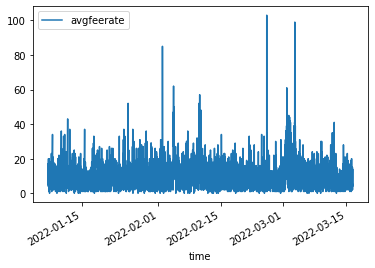

In [157]:
labels.plot(use_index = True, y = 'avgfeerate');

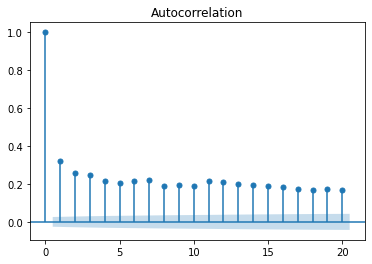

In [160]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(labels['avgfeerate'], lags=20, alpha = 0.01);

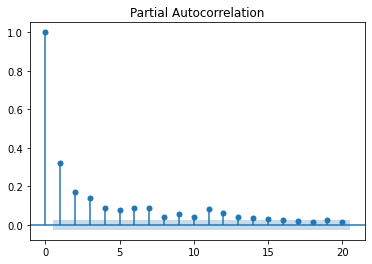

In [170]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(labels['avgfeerate'], lags=20, alpha = 0.01);

In [243]:
# ' "AHHHHHHHHHH" - Grizzly ' - Isaiah 
# Basically this does the same thing as the mempool data, where we resample to a time interval and take the mean values for labels 
# in that interval. I feel like I'm making to many assumptions doing this but my goal is to see how things change over time and its
# easier to do that with evenly spaced time intervals 

# the max time between blocks is ~ 01:44:47, the avg was ~00:09:47, median ~00:06:49, and min was 00:00:00
print(labels.reset_index().time.diff().max())
print(labels.reset_index().time.diff().min())
print(labels.reset_index().time.diff().mean())
print(labels.reset_index().time.diff().median())

data = labels.reset_index().groupby('time').mean().resample('9min').pad().dropna()

0 days 01:44:47
0 days 00:00:00
0 days 00:09:47.204920492
0 days 00:06:49


In [246]:
print(f"The data now has {data.shape[0]} observations")
data.head()

The data now has 10873 observations


,minfeerate,maxfeerate,medianfee,avgfeerate
time,,,,
2022-01-07 12:45:00,1.0,469.0,1390.0,17.0
2022-01-07 12:54:00,1.0,202.0,769.0,4.0
2022-01-07 13:03:00,1.0,202.0,769.0,4.0
2022-01-07 13:12:00,1.0,346.0,2087.0,16.0
2022-01-07 13:21:00,1.0,346.0,2087.0,16.0


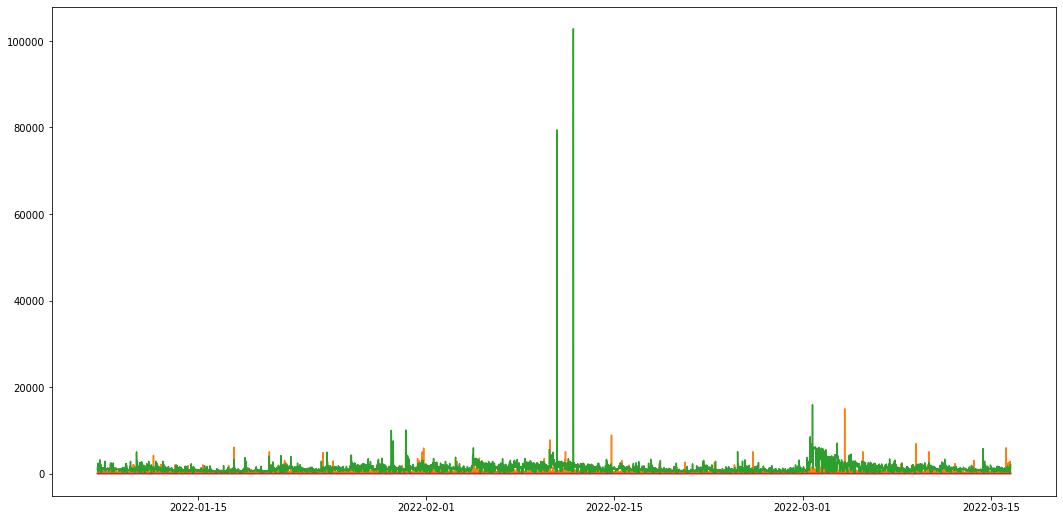

In [232]:
# experiment, lets see what results are with resampling and what its like without. I suppose we might not need resampling and that 
# may make more sense in the context of this problem (whats the fee rate in the next 9 min vs whats the fee rate for the next
# block?)

In [234]:
data.rolling(1).mean()

,minfeerate,maxfeerate,medianfee,avgfeerate
time,,,,
2022-01-07 12:45:00,1.0,469.0,1390.0,17.0
2022-01-07 13:00:00,1.0,202.0,769.0,4.0
2022-01-07 13:15:00,1.0,346.0,2087.0,16.0
2022-01-07 13:30:00,1.0,356.0,2100.0,19.0
2022-01-07 13:45:00,1.0,356.0,2100.0,19.0
...,...,...,...,...
2022-03-16 10:30:00,1.0,2851.0,1153.0,15.0
2022-03-16 10:45:00,0.0,251.0,352.0,2.0
2022-03-16 11:00:00,1.0,474.0,1400.0,12.0


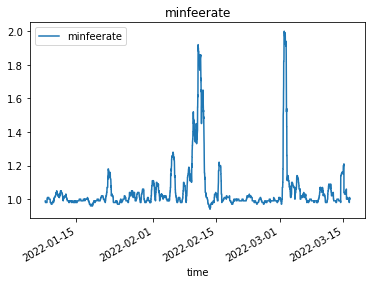

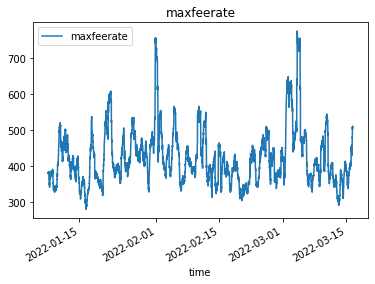

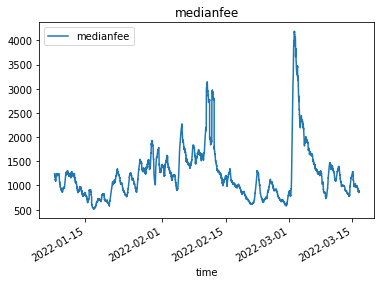

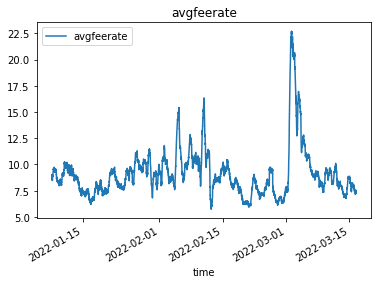

In [248]:
def plot_all(df, rollup_steps = 1):
    new_df = df.rolling(window = rollup_steps).mean()
    for col in new_df.columns:
        new_df.plot(use_index=True, y=col, kind='line', title=col)
plot_all(labels, 100)

In [74]:
### normalize with min max
## good practice is to do this after splitting into train test df's - otherwise you're using testing data to normalize your training
## data, which will make your model appear to be doing better than it is

# mean = df.mean()
# std = df.std()
# df_normalized = (df - mean) / std

# df_normalized

In [75]:
import sklearn

print(sklearn.__version__)


df.columns


0.24.1


Index(['avgfee', 'avgfeerate', 'avgtxsize', 'ins', 'maxfee', 'maxfeerate',
       'maxtxsize', 'medianfee', 'mediantime', 'mediantxsize', 'minfee',
       'minfeerate', 'mintxsize', 'outs', 'subsidy', 'swtotal_size',
       'swtotal_weight', 'swtxs', 'total_out', 'total_size', 'total_weight',
       'totalfee', 'txs', 'utxo_increase', 'utxo_size_inc',
       'feerate_10_percentiles', 'feerate_25_percentiles',
       'feerate_50_percentiles', 'feerate_75_percentiles',
       'feerate_90_percentiles', 'label_1', 'label_2', 'label_3'],
      dtype='object')

In [123]:
## Feature selection and eng

from sklearn.model_selection import train_test_split

print(df.columns)

# create datasets
train, test = train_test_split(df, test_size=0.1, random_state = 42)

# This is where we pick what cols are labels vs inputs
# i.e feature space


# labels = ['feerate_10_percentiles', 'feerate_25_percentiles',
#        'feerate_50_percentiles', 'feerate_75_percentiles',
#        'feerate_90_percentiles']

label = ['label_4']

inputs = ['avgfee', 'avgfeerate', 'avgtxsize', 'ins', 'maxfee', 'maxfeerate',
       'maxtxsize', 'medianfee', 'mediantime', 'mediantxsize', 'minfee',
       'minfeerate', 'mintxsize', 'outs', 'subsidy', 'swtotal_size',
       'swtotal_weight', 'swtxs', 'total_out', 'total_size', 'total_weight',
       'totalfee', 'txs', 'utxo_increase', 'utxo_size_inc',
       'feerate_10_percentiles', 'feerate_25_percentiles',
       'feerate_50_percentiles', 'feerate_75_percentiles',
       'feerate_90_percentiles']
# 

Index(['avgfee', 'avgfeerate', 'avgtxsize', 'ins', 'maxfee', 'maxfeerate',
       'maxtxsize', 'medianfee', 'mediantime', 'mediantxsize', 'minfee',
       'minfeerate', 'mintxsize', 'outs', 'subsidy', 'swtotal_size',
       'swtotal_weight', 'swtxs', 'total_out', 'total_size', 'total_weight',
       'totalfee', 'txs', 'utxo_increase', 'utxo_size_inc',
       'feerate_10_percentiles', 'feerate_25_percentiles',
       'feerate_50_percentiles', 'feerate_75_percentiles',
       'feerate_90_percentiles', 'label_1', 'label_2', 'label_3', 'label_4'],
      dtype='object')


In [124]:
train_labels = train[label].copy()
train_inputs = train[inputs].copy()

test_labels = test[label].copy()
test_inputs = test[inputs].copy()

In [121]:
df.corr()

,avgfee,avgfeerate,avgtxsize,ins,maxfee,maxfeerate,maxtxsize,medianfee,mediantime,mediantxsize,minfee,minfeerate,mintxsize,outs,subsidy,swtotal_size,swtotal_weight,swtxs,total_out,total_size,total_weight,totalfee,txs,utxo_increase,utxo_size_inc,feerate_10_percentiles,feerate_25_percentiles,feerate_50_percentiles,feerate_75_percentiles,feerate_90_percentiles,label_1,label_2,label_3,label_4
avgfee,1.000000,0.480213,0.436583,0.149509,0.313378,0.138500,0.049361,0.487765,0.044639,0.159803,0.560742,0.522913,0.107871,0.008004,NaN,0.110893,0.126143,-0.100801,0.091613,0.140978,0.164948,0.462033,-0.085503,-0.108579,-0.113170,0.525647,0.528326,0.485658,0.440883,0.361748,0.162718,0.047553,0.181702,0.223070
avgfeerate,0.480213,1.000000,-0.188293,0.023783,0.530256,0.321460,-0.168415,0.394620,0.042533,-0.027596,0.344304,0.153902,0.020359,0.409016,NaN,0.124627,0.138664,0.286219,0.367383,0.125115,0.131633,0.858726,0.315194,0.435577,0.431442,0.675367,0.754438,0.829847,0.829192,0.810166,0.132165,0.074735,0.187784,0.322513
avgtxsize,0.436583,-0.188293,1.000000,0.167386,-0.037851,-0.073856,0.202909,0.384742,-0.004004,0.487604,0.187165,0.204686,0.136951,-0.261427,NaN,0.106084,0.086507,-0.293426,-0.111498,0.105862,0.085096,-0.111088,-0.294772,-0.421861,-0.422989,0.001506,-0.036669,-0.111229,-0.130208,-0.143449,0.058036,-0.003959,0.040028,-0.018852
ins,0.149509,0.023783,0.167386,1.000000,0.182970,0.158710,0.558808,0.110763,0.045416,-0.001927,0.213224,0.106931,-0.131565,0.487504,NaN,0.906702,0.917078,0.611587,0.181198,0.953528,0.948559,0.445434,0.614224,-0.244262,-0.243006,0.290721,0.234493,0.100039,0.015922,-0.038339,0.074761,0.056988,0.078547,-0.030678
maxfee,0.313378,0.530256,-0.037851,0.182970,1.000000,0.209077,0.139024,0.151530,0.020542,-0.010335,0.134663,0.052171,-0.033790,0.214461,NaN,0.188502,0.197949,0.177396,0.159172,0.207116,0.216850,0.540261,0.188247,0.094427,0.092980,0.275618,0.299319,0.314933,0.392525,0.592395,0.034436,0.054773,0.071605,0.151030
maxfeerate,0.138500,0.321460,-0.073856,0.158710,0.209077,1.000000,0.039348,0.132178,0.010153,-0.017668,0.111834,0.029031,-0.019362,0.267594,NaN,0.185724,0.198183,0.222306,0.179433,0.197256,0.205793,0.367238,0.235060,0.172498,0.171712,0.227126,0.253688,0.253331,0.205362,0.207073,0.042939,0.052658,0.059225,0.085827
maxtxsize,0.049361,-0.168415,0.202909,0.558808,0.139024,0.039348,1.000000,-0.015843,0.060603,0.001908,-0.007393,-0.003604,-0.050870,0.099657,NaN,0.498157,0.465410,0.119480,-0.000564,0.500887,0.454151,0.079571,0.116957,-0.328372,-0.325266,-0.010993,-0.052891,-0.125045,-0.097629,-0.116302,-0.012810,0.020745,0.014912,-0.045324
medianfee,0.487765,0.394620,0.384742,0.110763,0.151530,0.132178,-0.015843,1.000000,0.058621,0.761483,0.333658,0.209713,0.052023,0.143012,NaN,0.113084,0.142320,0.065413,0.144235,0.126596,0.153110,0.404481,0.079631,0.071806,0.068024,0.436206,0.455894,0.448881,0.319571,0.242231,0.114185,0.058183,0.173979,0.201679
mediantime,0.044639,0.042533,-0.004004,0.045416,0.020542,0.010153,0.060603,0.058621,1.000000,-0.007072,0.052192,0.033331,-0.056861,0.035277,NaN,0.055471,0.046882,0.023286,0.007306,0.053038,0.042295,0.063161,0.023754,0.003496,0.002455,0.095204,0.099135,0.113410,0.073543,0.021683,0.033291,0.010111,0.058559,0.042612
mediantxsize,0.159803,-0.027596,0.487604,-0.001927,-0.010335,-0.017668,0.001908,0.761483,-0.007072,1.000000,0.061635,0.027219,0.036727,-0.035721,NaN,-0.010450,0.001978,-0.038194,-0.016305,-0.012466,-0.002863,-0.023242,-0.038562,-0.038158,-0.038681,-0.010160,-0.013793,-0.019976,-0.019490,-0.019313,-0.002608,0.003547,0.006075,0.011749


In [125]:
# linear regression for multioutput regression
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score

# define model
model = LinearRegression()
# fit model
model.fit(train_inputs, train_labels)
# make a prediction
r2_score = model.score(test_inputs, test_labels)

r2_score

0.20889346529464714

In [101]:
train_inputs

,avgfee,avgfeerate,feerate_10_percentiles,feerate_25_percentiles,feerate_50_percentiles,feerate_75_percentiles,feerate_90_percentiles
time,,,,,,,
2022-01-07 12:43:26,7219,17,6.0,6.0,6.0,7.0,11.0
2022-01-07 12:46:34,14014,10,6.0,6.0,6.0,6.0,9.0
2022-01-07 12:52:59,6070,11,5.0,6.0,6.0,9.0,13.0
2022-01-07 12:53:20,1604,4,3.0,3.0,4.0,5.0,5.0
2022-01-07 13:03:02,9962,16,6.0,6.0,9.0,11.0,21.0
...,...,...,...,...,...,...,...
2022-03-09 15:44:50,4177,7,4.0,4.0,4.0,5.0,11.0
2022-03-09 15:45:36,5400,4,4.0,4.0,4.0,4.0,4.0
2022-03-09 15:52:05,3258,7,4.0,4.0,4.0,8.0,11.0


In [79]:
# decision tree for multioutput regression
from sklearn.tree import DecisionTreeRegressor
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(train_inputs, train_labels)

accuracy = model.score(test_inputs, test_labels)

accuracy

-0.9491904774534374

In [80]:
# k-nearest neighbors for multioutput regression
from sklearn.neighbors import KNeighborsRegressor
# define model
model = KNeighborsRegressor(n_neighbors=3)
# fit model
model.fit(train_inputs, train_labels)


accuracy = model.score(test_inputs, test_labels)

accuracy

-1.7305136082656478

In [81]:
### TimeSeries 

df = df.sort_index()
df.head()


,avgfee,avgfeerate,avgtxsize,ins,maxfee,maxfeerate,maxtxsize,medianfee,mediantime,mediantxsize,minfee,minfeerate,mintxsize,outs,subsidy,swtotal_size,swtotal_weight,swtxs,total_out,total_size,total_weight,totalfee,txs,utxo_increase,utxo_size_inc,feerate_10_percentiles,feerate_25_percentiles,feerate_50_percentiles,feerate_75_percentiles,feerate_90_percentiles,label_1,label_2,label_3
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-07 12:43:26,7219,17,610,6956,5441172,469,80512,1390,1641574692,247,141,1,152,5898,625000000,1183340,2906270,1790,672946906293,1456266,3997974,17232234,2388,-1058,-77748,6.0,6.0,6.0,7.0,11.0,2.0,302.0,2060.0
2022-01-07 12:46:34,14014,10,1522,6580,855680,302,92274,2060,1641574723,247,327,2,188,2127,625000000,914081,3306344,538,2548063665887,1085443,3991792,9992520,714,-4453,-334909,6.0,6.0,6.0,6.0,9.0,1.0,302.0,1460.0
2022-01-07 12:52:59,6070,11,766,7620,2377982,302,102510,1460,1641576540,248,303,1,188,6004,625000000,1291511,3198104,1617,3131082924293,1489942,3991828,11807243,1946,-1616,-118504,5.0,6.0,6.0,9.0,13.0,1.0,202.0,769.0
2022-01-07 12:53:20,1604,4,575,7272,370440,202,65757,769,1641576622,225,143,1,151,6301,625000000,1566189,3327072,2670,146610621695,1732400,3991916,4825075,3009,-971,-68227,3.0,3.0,4.0,5.0,5.0,1.0,346.0,2087.0
2022-01-07 13:03:02,9962,16,791,6812,605920,346,84722,2087,1641577300,226,313,1,152,5415,625000000,998453,2754224,1302,1314552888683,1307804,3991628,16467858,1654,-1397,-105175,6.0,6.0,9.0,11.0,21.0,1.0,356.0,2100.0


In [82]:
# ==============================================================================
# Create and train forecaster
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

forecaster = ForecasterAutoreg(
                regressor=RandomForestRegressor(random_state=42),
                lags=6
             )

forecaster.fit(y=train['y'])

forecaster

ModuleNotFoundError: No module named 'skforecast'